# Exploración de Datasets Finales para Modelado

Este notebook explora los datasets creados por el pipeline de ciencia de datos.

## Prerequisitos:
- Ejecutar primero: `kedro run --pipeline=ciencia_datos`
- Asegurarse de que los datasets estén creados en `data/03_primary/`


## 1. Configuración Inicial


In [3]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Configurar visualizaciones
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Librerías importadas correctamente")

# Inicializar Kedro si no está disponible
try:
    # Verificar si catalog y session están disponibles
    if 'catalog' not in globals() or 'session' not in globals():
        print("Inicializando Kedro manualmente...")
        from kedro.framework.session import KedroSession
        from kedro.framework.startup import bootstrap_project
        
        # Bootstrap del proyecto - ruta absoluta
        project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
        bootstrap_project(project_root)
        
        # Crear sesión
        session = KedroSession.create()
        catalog = session.load_context().catalog
        
        print("✅ Kedro inicializado correctamente")
    else:
        print("✅ Kedro ya está disponible")
        
    print(f"Directorio de trabajo: {os.getcwd()}")
    print(f"Catalog disponible: {catalog is not None}")
    print(f"Session disponible: {session is not None}")
    
except Exception as e:
    print(f"❌ Error inicializando Kedro: {e}")
    print("💡 Solución: Ejecuta 'kedro jupyter notebook' desde la terminal")
    print("   O ejecuta este notebook desde el directorio raíz del proyecto")

Librerías importadas correctamente
Inicializando Kedro manualmente...


[09/17/25 14:53:42] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=641018;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=159360;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

✅ Kedro inicializado correctamente
Directorio de trabajo: C:\ProyectoML2\proyecto-ml\notebooks\ciencia_datos
Catalog disponible: True
Session disponible: True


## 2. Dataset con Features Temporales


In [4]:
# Cargar dataset con features temporales
try:
    df_features = catalog.load('dataset_con_features_temporales')
    
    print(f"Dataset Features Temporales: {df_features.shape}")
    print(f"\nColumnas disponibles ({len(df_features.columns)}):")
    for i, col in enumerate(df_features.columns, 1):
        print(f"{i:2d}. {col}")
    
    print(f"\nPrimeras 5 filas:")
    display(df_features.head())
    
    # Verificar tipos de datos
    print(f"\nTipos de datos:")
    print(df_features.dtypes.value_counts())
    
except Exception as e:
    print(f"Error cargando dataset: {e}")
    print("Asegúrate de haber ejecutado: kedro run --pipeline=ciencia_datos")


[09/17/25 14:53:53] INFO     Loading data from dataset_con_features_temporales (CSVDataset)... ]8;id=128465;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=70447;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

Dataset Features Temporales: (1246214, 31)

Columnas disponibles (31):
 1. año
 2. fecha_defuncion
 3. sexo
 4. tipo_edad
 5. edad_cantidad
 6. codigo_comuna
 7. comuna
 8. region
 9. codigo_diagnostico
10. descripcion_diagnostico
11. año_fecha
12. mes
13. dia_semana
14. trimestre
15. dia_año
16. mes_sin
17. mes_cos
18. dia_año_sin
19. dia_año_cos
20. trimestre_sin
21. trimestre_cos
22. dia_semana_codificado
23. dia_semana_sin
24. dia_semana_cos
25. es_fin_semana
26. es_invierno
27. es_verano
28. trimestre_fiscal
29. epoca_año_codificada
30. año_normalizado
31. decada

Primeras 5 filas:


,año,fecha_defuncion,sexo,tipo_edad,edad_cantidad,codigo_comuna,comuna,region,codigo_diagnostico,descripcion_diagnostico,...,dia_semana_codificado,dia_semana_sin,dia_semana_cos,es_fin_semana,es_invierno,es_verano,trimestre_fiscal,epoca_año_codificada,año_normalizado,decada
0,2015,2015-01-11,Mujer,2.0,4,13127.0,Recoleta,Metropolitana de Santiago,S00-T98,"Traumatismos, envenenamientos y algunas otras ...",...,7,-2.449294e-16,1.000000,1,1,0,4,1,0.1,2010
1,2016,2016-01-31,Hombre,1.0,20,8203.0,Cañete,Del Bíobío,S00-T98,"Traumatismos, envenenamientos y algunas otras ...",...,7,-2.449294e-16,1.000000,1,1,0,4,1,0.2,2010
2,2019,2019-08-08,Hombre,1.0,18,13303.0,Tiltil,Metropolitana de Santiago,S00-T98,"Traumatismos, envenenamientos y algunas otras ...",...,4,-4.338837e-01,-0.900969,0,0,1,2,3,0.5,2010
3,2015,2015-02-17,Hombre,1.0,19,13119.0,Maipú,Metropolitana de Santiago,S00-T98,"Traumatismos, envenenamientos y algunas otras ...",...,2,9.749279e-01,-0.222521,0,1,0,4,1,0.1,2010
4,2015,2015-01-03,Hombre,1.0,18,13115.0,Lo Barnechea,Metropolitana de Santiago,S00-T98,"Traumatismos, envenenamientos y algunas otras ...",...,6,-7.818315e-01,0.623490,1,1,0,4,1,0.1,2010



Tipos de datos:
int64      13
float64    11
object      7
Name: count, dtype: int64


## 3. Visualización de Features Cíclicos


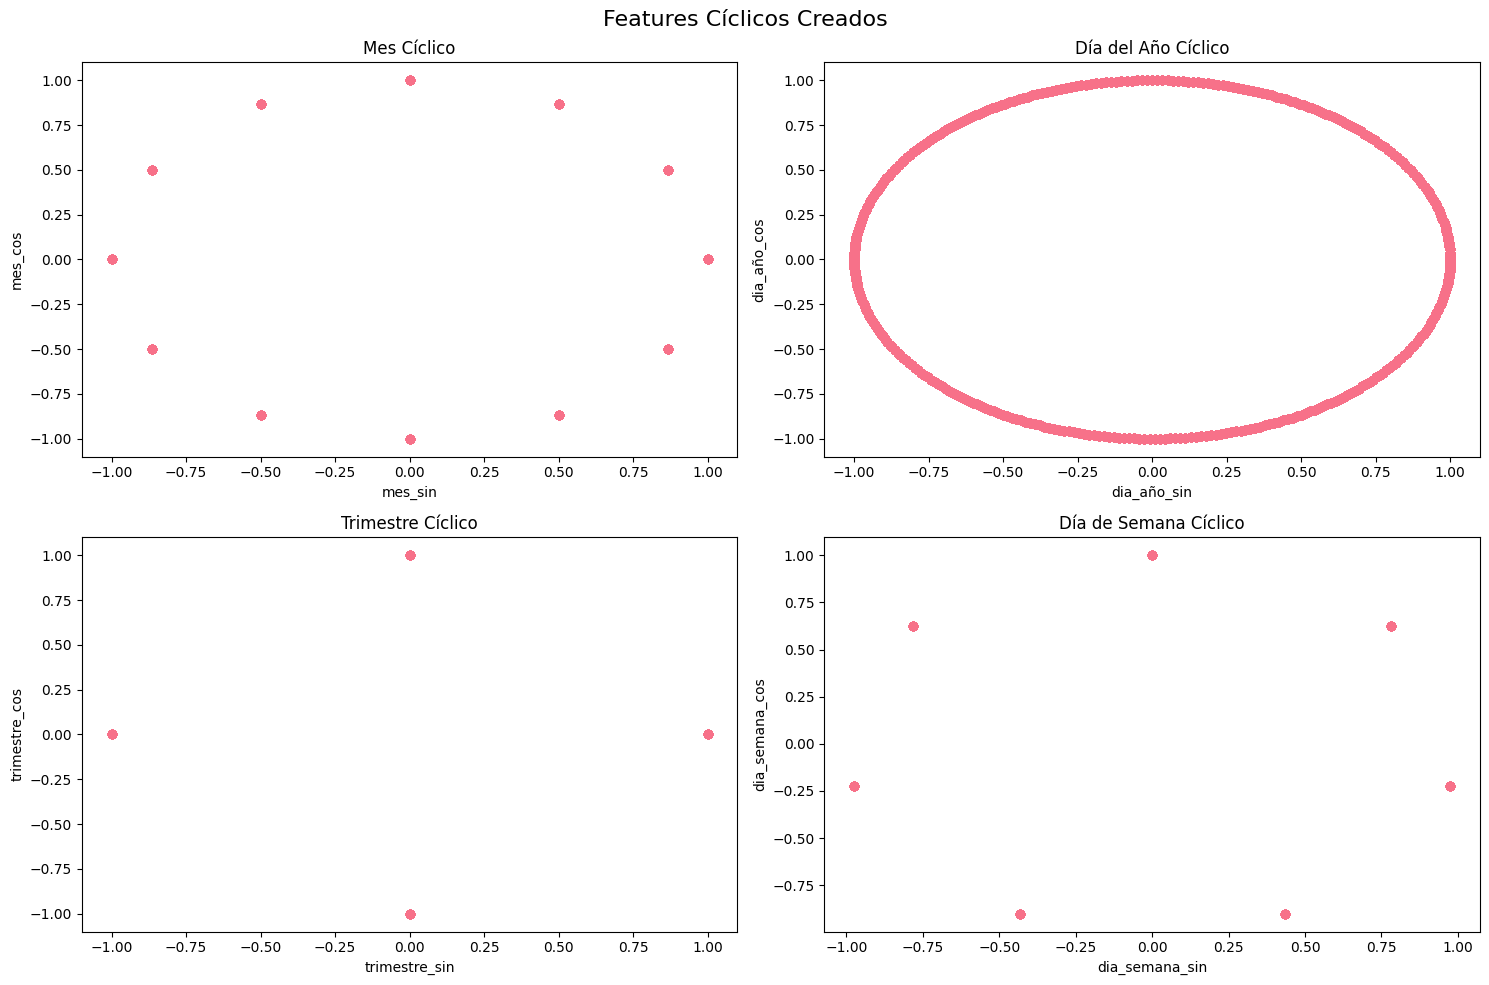

In [5]:
# Visualizar features cíclicos
if 'df_features' in locals():
    try:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Features Cíclicos Creados', fontsize=16)
        
        # Verificar qué columnas están disponibles
        ciclicas_cols = {
            'mes': ['mes_sin', 'mes_cos'],
            'dia_año': ['dia_año_sin', 'dia_año_cos'],
            'trimestre': ['trimestre_sin', 'trimestre_cos'],
            'dia_semana': ['dia_semana_sin', 'dia_semana_cos']
        }
        
        positions = [(0,0), (0,1), (1,0), (1,1)]
        titles = ['Mes Cíclico', 'Día del Año Cíclico', 'Trimestre Cíclico', 'Día de Semana Cíclico']
        
        for i, (key, cols) in enumerate(ciclicas_cols.items()):
            if cols[0] in df_features.columns and cols[1] in df_features.columns:
                row, col = positions[i]
                axes[row, col].scatter(df_features[cols[0]], df_features[cols[1]], alpha=0.1)
                axes[row, col].set_title(titles[i])
                axes[row, col].set_xlabel(cols[0])
                axes[row, col].set_ylabel(cols[1])
            else:
                row, col = positions[i]
                axes[row, col].text(0.5, 0.5, f'Columna {cols[0]} no encontrada', 
                                   ha='center', va='center', transform=axes[row, col].transAxes)
                axes[row, col].set_title(titles[i])
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error en visualización: {e}")
else:
    print("Primero ejecuta la celda anterior para cargar df_features")


## 4. Datasets Finales para Modelado


In [6]:
# Cargar datasets finales
try:
    datasets_finales = catalog.load('datasets_finales_modelado')
    
    print("Datasets Finales para Modelado:")
    for nombre, df in datasets_finales.items():
        if isinstance(df, pd.DataFrame):
            print(f"  {nombre}: {df.shape}")
    
    # Explorar dataset de regresión
    if 'dataset_regresion' in datasets_finales:
        df_reg = datasets_finales['dataset_regresion']
        print(f"\nDataset Regresión - Primeras 5 filas:")
        display(df_reg.head())
        
        print(f"\nEstadísticas Descriptivas:")
        display(df_reg.describe())
        
except Exception as e:
    print(f"Error cargando datasets finales: {e}")
    print("Asegúrate de haber ejecutado el pipeline de ciencia de datos")


[09/17/25 14:54:33] INFO     Loading data from datasets_finales_modelado (PickleDataset)...    ]8;id=888994;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=541089;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

Datasets Finales para Modelado:
  dataset_regresion: (1246214, 19)
  dataset_temporal: (1246214, 32)
  dataset_indexado: (1246214, 32)
  dataset_resumido: (129, 10)
  dataset_completo: (1246214, 31)

Dataset Regresión - Primeras 5 filas:


,año,mes,trimestre,dia_año,mes_sin,mes_cos,dia_año_sin,dia_año_cos,trimestre_sin,trimestre_cos,dia_semana_sin,dia_semana_cos,es_fin_semana,es_invierno,es_verano,trimestre_fiscal,epoca_año_codificada,año_normalizado,decada
0,2015,-1.640075,-1.373906,-1.672991,0.736434,1.317127,0.262049,1.471543,1.456697,0.070268,-0.002207,1.408159,1.575309,1.838175,-0.639194,1.409802,1,-1.355152,2010
1,2016,-1.640075,-1.373906,-1.475639,0.736434,1.317127,0.721470,1.301695,1.456697,0.070268,-0.002207,1.408159,1.575309,1.838175,-0.639194,1.409802,1,-1.030697,2010
2,2019,0.470732,0.483128,0.389339,-1.212729,-0.607356,-0.870359,-1.024927,-1.342690,0.070268,-0.616260,-1.278294,-0.634796,-0.544018,1.564471,-0.377471,3,-0.057332,2010
3,2015,-1.338531,-1.373906,-1.307889,1.258711,0.801463,1.046556,1.044680,1.456697,0.070268,1.377559,-0.319510,-0.634796,1.838175,-0.639194,1.409802,1,-1.355152,2010
4,2015,-1.640075,-1.373906,-1.751932,0.736434,1.317127,0.066196,1.494730,1.456697,0.070268,-1.108693,0.876074,1.575309,1.838175,-0.639194,1.409802,1,-1.355152,2010



Estadísticas Descriptivas:


,año,mes,trimestre,dia_año,mes_sin,mes_cos,dia_año_sin,dia_año_cos,trimestre_sin,trimestre_cos,dia_semana_sin,dia_semana_cos,es_fin_semana,es_invierno,es_verano,trimestre_fiscal,epoca_año_codificada,año_normalizado,decada
count,1.246214e+06,1.246214e+06,1.246214e+06,1.246214e+06,1.246214e+06,1.246214e+06,1.246214e+06,1.246214e+06,1.246214e+06,1.246214e+06,1.246214e+06,1.246214e+06,1.246214e+06,1.246214e+06,1.246214e+06,1.246214e+06,1.246214e+06,1.246214e+06,1.246214e+06
mean,2.019177e+03,-6.422295e-17,-6.714217e-17,5.546527e-17,-1.751535e-17,1.167690e-17,0.000000e+00,2.627302e-17,2.627302e-17,-6.130372e-17,-2.095912e-17,-2.554322e-18,-6.933159e-18,-2.992205e-17,-2.627302e-17,1.328247e-16,2.525340e+00,-2.802456e-16,2.014942e+03
std,3.082095e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.081547e+00,1.000000e+00,4.999663e+00
min,2.014000e+03,-1.640075e+00,-1.373906e+00,-1.771667e+00,-1.403895e+00,-1.311766e+00,-1.441498e+00,-1.306946e+00,-1.342690e+00,-1.364885e+00,-1.381972e+00,-1.278294e+00,-6.347960e-01,-5.440178e-01,-6.391936e-01,-1.271107e+00,1.000000e+00,-1.679606e+00,2.010000e+03
25%,2.017000e+03,-7.354434e-01,-4.453888e-01,-8.342441e-01,-1.212729e+00,-1.123020e+00,-9.928385e-01,-1.010244e+00,-1.342690e+00,-1.364885e+00,-1.108693e+00,-1.278294e+00,-6.347960e-01,-5.440178e-01,-6.391936e-01,-1.271107e+00,2.000000e+00,-7.062420e-01,2.010000e+03
50%,2.019000e+03,-1.323557e-01,-4.453888e-01,4.502681e-03,2.299103e-02,9.705340e-02,2.920472e-02,-9.165893e-02,5.700356e-02,7.026778e-02,-2.206940e-03,-3.195103e-01,-6.347960e-01,-5.440178e-01,-6.391936e-01,-3.774706e-01,3.000000e+00,-5.733246e-02,2.010000e+03
75%,2.022000e+03,7.722758e-01,4.831281e-01,8.136466e-01,7.364341e-01,8.014630e-01,9.772162e-01,1.008632e+00,5.700356e-02,7.026778e-02,1.104279e+00,8.760738e-01,1.575309e+00,-5.440178e-01,1.564471e+00,5.161655e-01,3.000000e+00,9.160318e-01,2.020000e+03
max,2.024000e+03,1.676907e+00,1.411645e+00,1.830010e+00,1.449877e+00,1.505873e+00,1.425875e+00,1.496599e+00,1.456697e+00,1.505420e+00,1.377559e+00,1.408159e+00,1.575309e+00,1.838175e+00,1.564471e+00,1.409802e+00,4.000000e+00,1.564941e+00,2.020000e+03


## 5. Resumen de Datasets Disponibles


In [7]:
print("RESUMEN DE DATASETS PARA MODELADO:")
print("=" * 50)

print("\n1. DATASET REGRESIÓN:")
print("   • Propósito: Modelos de regresión y predicción")
print("   • Features: Variables temporales cíclicas")
print("   • Algoritmos: Regresión lineal, Random Forest, XGBoost")

print("\n2. DATASET TEMPORAL:")
print("   • Propósito: Análisis de series de tiempo")
print("   • Features: Índice temporal, fechas ordenadas")
print("   • Algoritmos: ARIMA, Prophet, LSTM")

print("\n3. DATASET INDEXADO:")
print("   • Propósito: Identificación única y análisis granular")
print("   • Features: ID único por año/mes/región/sexo")
print("   • Algoritmos: Clustering, análisis de cohortes")

print("\n4. DATASET RESUMIDO:")
print("   • Propósito: Análisis agregado y dashboards")
print("   • Features: Promedios por año/mes")
print("   • Algoritmos: Análisis estadístico, visualizaciones")

print("\n5. DATASET COMPLETO:")
print("   • Propósito: Modelos avanzados de ML")
print("   • Features: Todas las variables normalizadas")
print("   • Algoritmos: Deep Learning, Ensemble methods")

print("\nTodos los datasets están listos para modelado!")


RESUMEN DE DATASETS PARA MODELADO:

1. DATASET REGRESIÓN:
   • Propósito: Modelos de regresión y predicción
   • Features: Variables temporales cíclicas
   • Algoritmos: Regresión lineal, Random Forest, XGBoost

2. DATASET TEMPORAL:
   • Propósito: Análisis de series de tiempo
   • Features: Índice temporal, fechas ordenadas
   • Algoritmos: ARIMA, Prophet, LSTM

3. DATASET INDEXADO:
   • Propósito: Identificación única y análisis granular
   • Features: ID único por año/mes/región/sexo
   • Algoritmos: Clustering, análisis de cohortes

4. DATASET RESUMIDO:
   • Propósito: Análisis agregado y dashboards
   • Features: Promedios por año/mes
   • Algoritmos: Análisis estadístico, visualizaciones

5. DATASET COMPLETO:
   • Propósito: Modelos avanzados de ML
   • Features: Todas las variables normalizadas
   • Algoritmos: Deep Learning, Ensemble methods

Todos los datasets están listos para modelado!
